In [1]:
import scanpy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp

In [2]:
input_file = "/Users/manuel/OneDrive/jupyter_notebooks/scanpy_scRNA-seq_analysis/dge_matrix_umid1_presel.h5ad"
sp_dge = sp.read(input_file)

In [3]:
sp.pp.normalize_total(sp_dge, target_sum=1e4)

In [4]:
sp.pp.log1p(sp_dge)

In [5]:
sp_dge.raw = sp_dge

In [6]:
sp.pp.highly_variable_genes(sp_dge, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [7]:
sp_dge = sp_dge[:, sp_dge.var.highly_variable]

In [15]:
sp_dge

AnnData object with n_obs × n_vars = 153479 × 2876 
    obs: 'no_umis', 'keep', 'no_umis_log10', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [8]:
sp.pp.scale(sp_dge, max_value=10)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [9]:
sp.tl.pca(sp_dge, svd_solver='arpack')

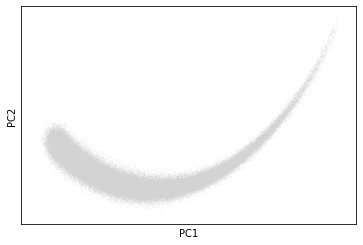

In [10]:
sp.pl.pca(sp_dge)

In [11]:
sp.pp.neighbors(sp_dge, n_neighbors=10, n_pcs=40)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../ana

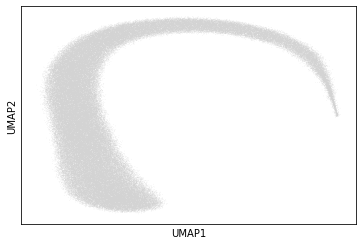

In [13]:
sp.tl.umap(sp_dge)

In [14]:
sp.tl.leiden(sp_dge)

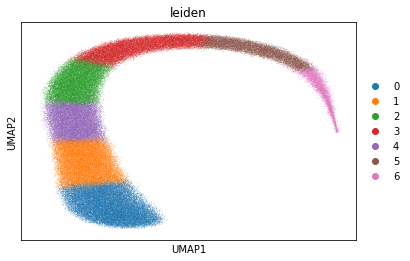

In [16]:
sp.pl.umap(sp_dge, color='leiden')